##### Praticando 
* Regressão Logística

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Base de Dados
dados = pd.read_csv('./Data/framingham.csv')
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Visualizando as informação
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
# Verificando se existe NAs
dados.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# Removendo as NAs
dados = dados.dropna()

In [7]:
# Verificando as NAs novamente
dados.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

C:\Users\João Inácio\AppData\Local\Temp\ipykernel_8840\781811289.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dados.hist(ax=ax)


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

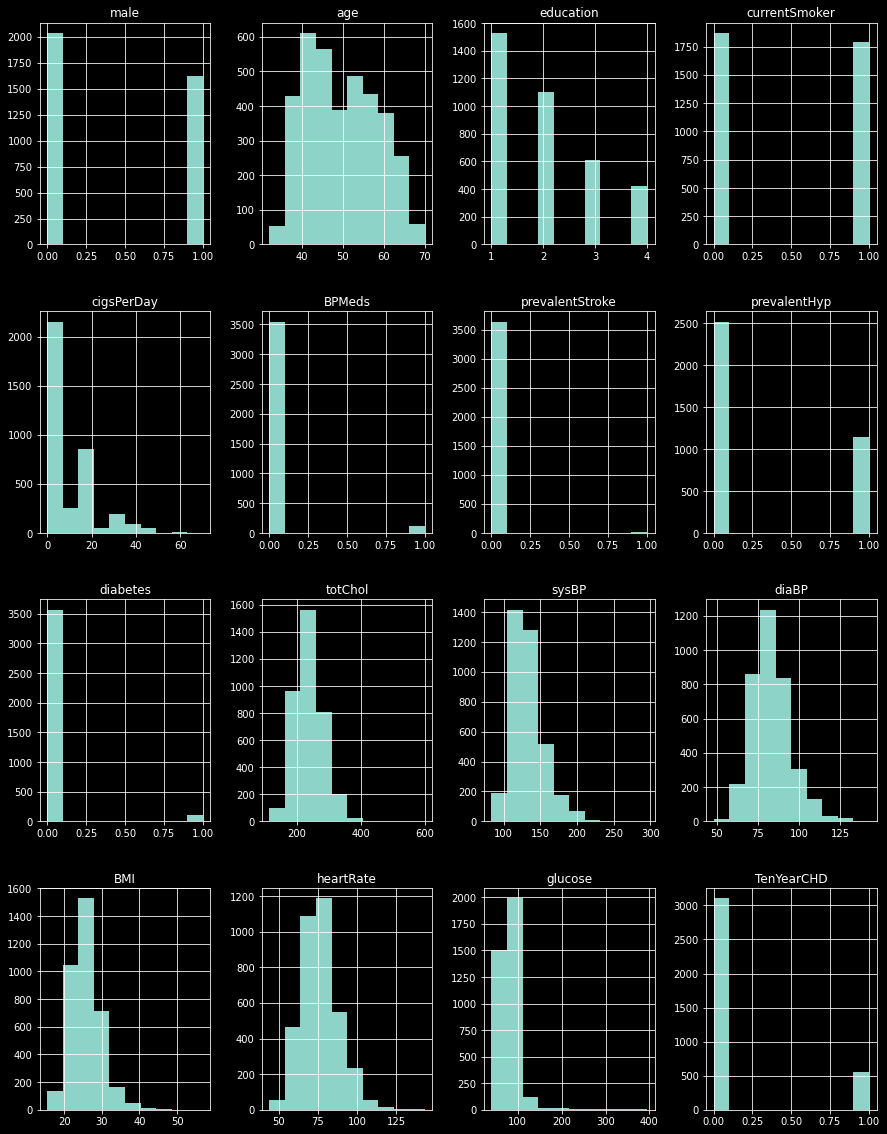

In [8]:
# Verificando a distribuição dos dados
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dados.hist(ax=ax)

In [9]:
# Verificando a correlação entre as variáveis
correlacao = dados.corr()

<AxesSubplot:>

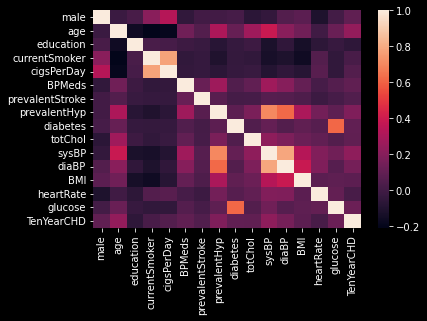

In [10]:
# Visualizando 
sns.heatmap(correlacao)

In [ ]:
"""
O grau de escolaridade da pessoa não é um fator importante uma vez que depende
do entendimento do médico
"""
dados = dados.drop('education',axis=1)

In [ ]:
# Normalizando os dados de algumas colunas